In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_euca_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Eucalyptol
0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,...,1,0,0,0,0,0,1,0,0,0.0
1,3,0.0,0.0,0.0,0.0,0.0,0.145484,0.0,0.0,0.000000,...,0,1,0,0,0,0,0,0,0,0.0
2,6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42956,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
74996,42956,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
74997,42970,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
74998,42972,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.0


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Eucalyptol', 'index'], axis = 1)
y = df_knn[['X..Eucalyptol']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

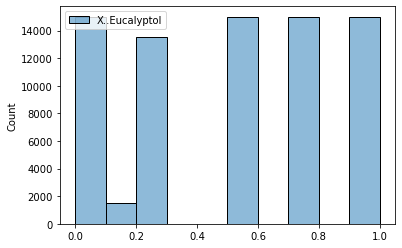

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.04880894586894582

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8842282425666976

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.7997161819810471

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([9.50709712e-04, 7.25506712e-04, 1.06175019e-03, 3.77420911e-04,
       9.49802922e-04, 2.27476398e-03, 3.26943316e-03, 1.60597190e-03,
       8.04969121e-04, 1.32683074e-03, 7.87967317e-04, 1.16852560e-02,
       8.94700360e-04, 2.87081609e-04, 1.95698073e-04, 6.93021712e-04,
       4.57830233e-04, 1.06970874e-03, 3.39507302e-04, 1.85245672e-03,
       2.04189128e-03, 1.67982995e-03, 8.99596676e-04, 3.74366573e-04,
       4.93617796e-04, 1.39000095e-03, 9.84487521e-04, 5.71634896e-04,
       6.63257756e-04, 6.53166385e-04, 2.73019461e-03, 4.45941247e-04,
       1.76648456e-03, 4.25125329e-04, 1.75794654e-03, 2.67170379e-03,
       3.33971313e-03, 2.57258195e-03, 8.74015259e-04, 8.08426902e-04,
       2.84169484e-04, 1.13997990e-03, 5.92924068e-05, 3.88665646e-03,
       7.83065614e-04, 1.95192903e-03, 1.89169150e-03, 3.20216402e-04,
       1.18685021e-03, 2.77161046e-04, 6.58338435e-04, 1.98321678e-03,
       9.28273580e-04, 7.32243320e-04, 1.27025125e-03, 2.90739567e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
        True, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_5,tfidf_6,tfidf_11,tfidf_30,tfidf_35,tfidf_36,tfidf_37,tfidf_43,tfidf_58,tfidf_73,...,blueberry,cheese,citrus,diesel,earthy,grape,lemon,orange,strawberry,sweet
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.198545,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0.145484,0.0,0.0,0.0,0.213037,0.0,0.0,0.000000,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74996,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74997,0.000000,0.0,0.0,0.0,0.182564,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74998,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_5',
 'tfidf_6',
 'tfidf_11',
 'tfidf_30',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_43',
 'tfidf_58',
 'tfidf_73',
 'tfidf_82',
 'tfidf_93',
 'tfidf_119',
 'tfidf_121',
 'tfidf_124',
 'tfidf_126',
 'tfidf_128',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_151',
 'tfidf_158',
 'tfidf_161',
 'tfidf_162',
 'tfidf_166',
 'tfidf_167',
 'tfidf_168',
 'tfidf_194',
 'tfidf_197',
 'tfidf_199',
 'tfidf_200',
 'tfidf_207',
 'tfidf_210',
 'tfidf_216',
 'tfidf_220',
 'tfidf_223',
 'tfidf_230',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_272',
 'tfidf_281',
 'tfidf_285',
 'tfidf_286',
 'tfidf_290',
 'tfidf_309',
 'tfidf_312',
 'tfidf_325',
 'tfidf_329',
 'tfidf_337',
 'tfidf_342',
 'tfidf_345',
 'tfidf_355',
 'tfidf_357',
 'tfidf_362',
 'tfidf_376',
 'hybrid',
 'indica',
 'sativa',
 'dry mouth',
 'energetic',
 'euphoric',
 'focused',
 'happy',
 'relaxed',
 'uplifted',
 'berry',
 'blueberry',
 'cheese',
 'citrus',
 'diesel',
 'earthy',
 'grape',
 'lemon',
 'orang

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_euca.pkl")
joblib.dump(selector, "selector_knn_tfidf_euca.pkl")

['selector_knn_tfidf_euca.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.04045918803418798

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.02078279403170425

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1441623877150495

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8969453984023614

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.8354531818119961

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.029869702448479606

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.015898499551306077

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.126089252322734

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.984307417610795

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8741243592589125

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_euca.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_euca.pkl")

['y_test_knreg_tfidf_euca.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.029178350861007108

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.8697347548151759

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.01636095775627691

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.12790995956639542

In [47]:
y_test

,X..Eucalyptol
11591,0.50
52020,0.75
34666,0.25
22169,1.00
23049,1.00
...,...
60863,0.00
32316,0.25
60933,0.50
43206,0.25


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

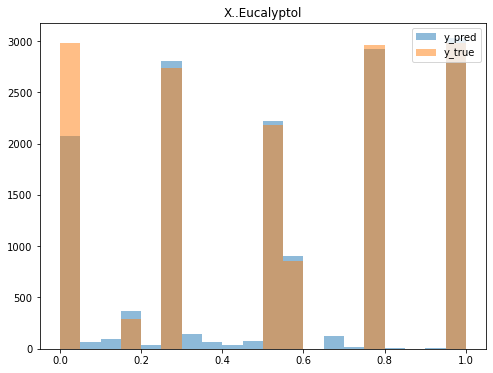

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Eucalyptol"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_euca.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.935
P-value: 0.000


<AxesSubplot:>

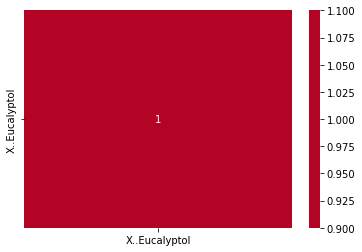

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)